This notebook contains code to plot heterozygosity distributions 

In [13]:
%pylab inline
import os
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import time
import statistics
from scipy import stats

PLOTDIR = 'pdfs-round1'
SUPP_PREFIX = "SuppFig8-"
RESFOLDER = '/gymreklab-tscc/bonnieh/joint_method/'

Populating the interactive namespace from numpy and matplotlib


12
0.2


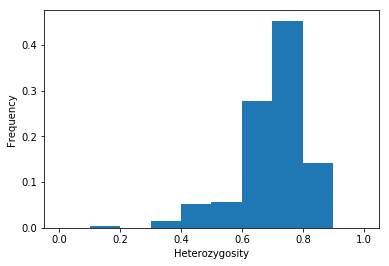

0.2


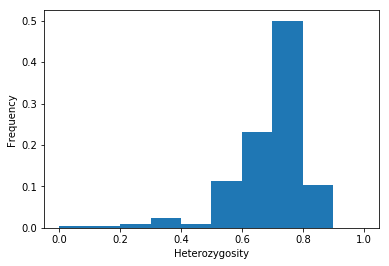

0.2


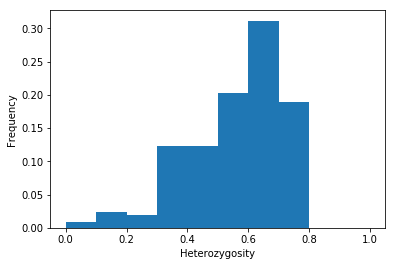

In [14]:
pers = [3] # Change based on what period you want to plot
opt_dic = {}
opt_dic[2] = [20] # Change based on what optimal allele you want to plot
opt_dic[3] = [12] # Change based on what optimal allele you want to plot
opt_dic[4] = [7] # Change based on what optimal allele you want to plot
k_list = [2]
models = ['b','a','c'] # Change based on what models you want to plot
model_prefix = 'eurodem_prior2_trinuc_' # Change based on what period you want to plot (e.g. dinuc, trinuc, tetranuc)
motif = 'AAT' # Change based on what motif you want to plot
    
# Get number of loci 
optimal_allele = opt_dic[pers[0]][0]
print(optimal_allele)
if optimal_allele < 10:
    optimal_allele_string = '0' + str(optimal_allele)
else:
    optimal_allele_string = str(optimal_allele)
filename = '/gymreklab-tscc/bonnieh/joint_method/results_intergenic_top_x/1kg_bin_agnostic_071921/per_%d_%s_all_col_6_opt_%s.txt'%(pers[0],motif,optimal_allele_string)
results_file = open(filename, 'r')
                        
for k in range(0, 2):
    line= results_file.readline()
                        
info = line.strip().split(': ')
num_loci = info[1]
num_loci = num_loci.strip().split(' ')
num_loci = int(num_loci[0])
results_file.close()
    
for model_suffix in models:
    for k_val in k_list:
        #theta_val = mean/k_val
        theta_val = 0.1
        for period in pers:
            for aa in range (0, 1):
                #optimal_allele = opt_allele #in opt_dic[period]:
                    
                model = model_prefix + model_suffix + '_1kg_euro'
                label = 'Het'
                setting = str(period) + ' ' + str(optimal_allele) + ' ' + str(k_val) + ' ' + str(theta_val)
                    
                print(k_val*theta_val)
                obs_het_stats = [1,1,1]
                obs_common_stats = [1,1,1]
                eps_het = [10,10,10]
                eps_common = [10, 10,10]
                obs_het_vector = [0,0,0]
                obs_common_vector = [0,0,0]
                use_common_alleles = False
                num_bins = 0
                use_bins = True
                eps_bins_het =0.5 
                eps_bins_common=0.5
                    
                # Get ABC tables
                ABC_tables = {}
                opt_allele_dic = {}
                opt_allele_dic[1] = [12,16]
                opt_allele_dic[3] = [5,6,7,8,9,10,11,12,13]
                opt_allele_dic[2] = [11,12,13,14,15,16,17,18,19,20]
                opt_allele_dic[4] = [7,8,9,10]

                obs_mean_het_list = []
                obs_var_het_list = []
                obs_med_het_list = []
                obs_mean_comm_list = []
                obs_var_comm_list = []
                obs_med_comm_list = []

                for opt_allele in opt_allele_dic[period]:
                    file = '/gymreklab-tscc/bonnieh/abc/results/'+model+'/' + str(period) + '_' + str(opt_allele) + '.txt' 
                    table = GetABCList(file, num_bins)
                    dic_summ_stats = {}
                    for combo in table:
                        s_round = get_LRT_bin(combo[0])
                        if s_round not in dic_summ_stats:
                            dic_summ_stats[s_round] = []
                        dic_summ_stats[s_round].append([combo[1], combo[2]])

                    ABC_tables[opt_allele] = dic_summ_stats

                opt_allele_list = [(period,optimal_allele)] * num_loci #37
                '''
                het_list, common_list = EstimateParam(ABC_tables, opt_allele_list, k_val, theta_val, obs_het_stats, \
                                                            obs_common_stats, obs_het_vector, obs_common_vector, \
                                                      model, eps_het, eps_common, use_common_alleles,use_bins, eps_bins_het, eps_bins_common, True)
                '''
                het_list, common_list = GetLists(ABC_tables, opt_allele_list, k_val, theta_val)
                if label == 'Het':
                    list_to_use = het_list

                else:
                    list_to_use = common_list
                plt.hist(list_to_use,bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],weights=np.ones(len(list_to_use)) / len(list_to_use))#,bins=[0,0.002,0.1,0.4,0.8,1]) #bins=[0,0.001,0.1,0.3,0.7,1] #[0,0.001,0.02,0.1,0.3,0.6,0.7,0.8,1]
                #plt.hist(list_to_use,bins=[0,0.1,0.4,0.8,1]) 
                #plt.hist(list_to_use,bins=[0,2,4,22])
                #plt.xlabel(label)
                plt.xlabel('Heterozygosity')
                plt.ylabel('Frequency')
                plt.savefig(os.path.join(PLOTDIR, 'sim_het_distr.pdf'), bbox_inches='tight')

    
                #plt.title('Setting %s \n Simulated %s distribution \n Mean %s = %.2f Median %s = %.2f \n Max %s = %.2f Min %s = %.2f'%(setting, label, label, np.mean(list_to_use), label, np.median(list_to_use), label, max(list_to_use), label, min(list_to_use)))
                plt.show()
                    
                solution_file = open('./het_distr/%s_%d_%s.txt'%(motif,optimal_allele,model_suffix),'w')
                solution_file.write(str(list_to_use))
                solution_file.close()
                

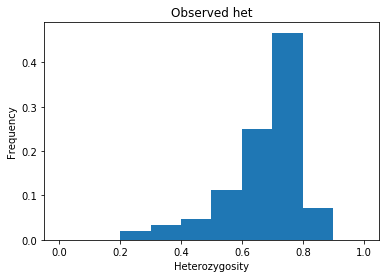

In [15]:
#inFile = '/gymreklab-tscc/bonnieh/joint_method/results_intergenic_top_x/1kg_bin_agnostic_redo/per_%d_%s_all_opt_%d.txt'
#filename = '/gymreklab-tscc/bonnieh/joint_method/results_intergenic_top_x/1kg_bin_agnostic_redo/per_%d_%s_all_opt_%d.txt'%(pers[0],motif,opt_allele)
#print(opt_allele)
allele_freqs_file = open(filename, 'r')

header = allele_freqs_file.readline().strip().split('\t')
header = allele_freqs_file.readline().strip().split('\t')
header = allele_freqs_file.readline().strip().split('\t')
info = allele_freqs_file.readline().strip().split(': ')
    
list_het = info[1]
list_het = list_het[1:]
list_het = list_het[:-1]
het_list = list_het.strip().split(', ')

het_list_final = []
for elem in het_list:
    het_list_final.append(float(elem))
#print(het_list_final)
  
plt.hist(het_list_final, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], weights=np.ones(len(het_list_final)) / len(het_list_final))
plt.title('Observed het')
plt.xlabel('Heterozygosity')
plt.ylabel('Frequency')
plt.savefig(os.path.join(PLOTDIR, SUPP_PREFIX + 'obs_het_distr.pdf'), bbox_inches='tight')

solution_file = open('./het_distr/obs_%s_%d.txt'%(motif,optimal_allele),'w')
solution_file.write(str(het_list_final))
solution_file.close()

In [16]:
inFile = './het_distr/obs_%s_%d.txt'%(motif,optimal_allele)

allele_freqs_file = open(inFile, 'r')

info = allele_freqs_file.readline().strip()
    
list_het = info[1:]
list_het = list_het[:-1]
het_list = list_het.strip().split(', ')

het_list_obs = []
for elem in het_list:
    het_list_obs.append(float(elem))
allele_freqs_file.close()
#print(het_list_final)

'''
solution_file = open('obs.txt','w')
solution_file.write(str(het_list_final))
solution_file.close()
'''

"\nsolution_file = open('obs.txt','w')\nsolution_file.write(str(het_list_final))\nsolution_file.close()\n"

In [17]:
inFile = './het_distr/%s_%d_%s.txt'%(motif,optimal_allele,models[0])

allele_freqs_file = open(inFile, 'r')

info = allele_freqs_file.readline().strip()
    
list_het = info[1:]
list_het = list_het[:-1]
het_list = list_het.strip().split(', ')

het_list_d = []
for elem in het_list:
    het_list_d.append(float(elem))
allele_freqs_file.close()
#print(het_list_final)

In [18]:
inFile = './het_distr/%s_%d_%s.txt'%(motif,optimal_allele,models[1])

allele_freqs_file = open(inFile, 'r')

info = allele_freqs_file.readline().strip()
    
list_het = info[1:]
list_het = list_het[:-1]
het_list = list_het.strip().split(', ')

het_list_e = []
for elem in het_list:
    het_list_e.append(float(elem))
allele_freqs_file.close()
#print(het_list_final)

In [19]:
inFile = './het_distr/%s_%d_%s.txt'%(motif,optimal_allele,models[2])

allele_freqs_file = open(inFile, 'r')

info = allele_freqs_file.readline().strip()

list_het = info[1:]
list_het = list_het[:-1]
het_list = list_het.strip().split(', ')

het_list_f = []
for elem in het_list:
    het_list_f.append(float(elem))
allele_freqs_file.close()

0.028543570462213126


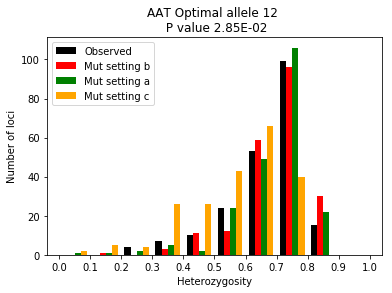

In [20]:
plt.hist([het_list_obs, het_list_d,het_list_e,het_list_f], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], label=['Observed', 'Mut setting %s'%(models[0]),'Mut setting %s'%(models[1]),'Mut setting %s'%(models[2])],color=['black','red','green','orange'])
#plt.legend(bbox_to_anchor=(1, 1))
plt.legend()
plt.xlabel('Heterozygosity')
plt.ylabel('Number of loci')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) 

ks_stat, pval = stats.ks_2samp(het_list_obs, het_list_e)
print(pval)
plt.title('%s Optimal allele %d \n P value %.2E'%(motif, optimal_allele, pval))
plt.savefig(os.path.join(PLOTDIR, SUPP_PREFIX + 'het_distr_motif_%s_opt_%s.pdf'%(motif,optimal_allele)),bbox_inches='tight')

In [21]:
ks_stat, pval = stats.ks_2samp(het_list_obs, het_list_e)
print(pval)

0.028543570462213126
